For this project, I am going to use a data set from [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata). You can download the data [here](https://drive.google.com/open?id=16sHz6gYoYUTFpf_0hOWEdFgFs053Tqr2). 

This data contains usage behavior of about 9000 active credit card holders during a period of 6 months. There are 18 features describing different behaviours of customers:

- CUST_ID : Identification of Credit Card holder (Categorical) 

- BALANCE : Balance amount left in their account to make purchases 

- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

- PURCHASES : Amount of purchases made from account 

- ONEOFF_PURCHASES : Maximum purchase amount done in one-go

- INSTALLMENTS_PURCHASES : Amount of purchase done in installment 

- CASH_ADVANCE : Cash in advance given by the user 

- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 

- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 

- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 

- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 

- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 

- PURCHASES_TRX : Number of purchase transactions made 

- CREDIT_LIMIT : Limit of Credit Card for user 

- PAYMENTS : Amount of Payment done by user 

- MINIMUM_PAYMENTS : Minimum amount of payments made by user 

- PRCFULLPAYMENT : Percent of full payment paid by user 

- TENURE : Tenure of credit card service for user

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data with customer id as the index column
df = pd.read_csv('data/CC_GENERAL.csv', index_col=0)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

In [3]:
df.shape

(8950, 17)

In [4]:
# Check for null values
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Check percentage of null values
df.isna().sum() / len(df)

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

We could probably get away with dropping these 313 null values in the MINIMUM_PAYMENTS column because it only represents 3.5% of the data, but let's try to impute values as an exercise.

We'll explore the null valued rows to see if we can pick up any useful information.

In [6]:
df[df['MINIMUM_PAYMENTS'].isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10004   1666.670542           0.636364    1499.00           1499.00   
C10047   2242.311686           1.000000     437.00             97.00   
C10049   3910.111237           1.000000       0.00              0.00   
C10056      6.660517           0.636364     310.00              0.00   
C10057   1311.995984           1.000000    1283.90           1283.90   
...              ...                ...        ...               ...   
C19160     14.524779           0.333333     152.00            152.00   
C19170    371.527312           0.333333       0.00              0.00   
C19176    183.817004           1.000000     465.90              0.00   
C19185    193.571722           0.833333    1012.73           1012.73   
C19187     19.183215           1.000000     300.00              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10004                      0.0    205.788017             0.083333   
C10047                    340.0    184.648692             0.333333   
C10049                      0.0   1980.873201             0.000000   
C10056                    310.0      0.000000             0.666667   
C10057                      0.0      0.000000             0.250000   
...                         ...           ...                  ...   
C19160                      0.0      0.000000             0.333333   
C19170                      0.0   1465.407927             0.000000   
C19176                    465.9      0.000000             1.000000   
C19185                      0.0      0.000000             0.333333   
C19187                    300.0      0.000000             1.000000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10004                     0.083333                          0.000000   
C10047                     0.083333                          0.333333   
C10049                     0.000000                          0.000000   
C10056                     0.000000                          0.666667   
C10057                     0.250000                          0.000000   
...                             ...                               ...   
C19160                     0.333333                          0.000000   
C19170                     0.000000                          0.000000   
C19176                     0.000000                          0.833333   
C19185                     0.333333                          0.000000   
C19187                     0.000000                          0.833333   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10004                 0.083333                 1              1   
C10047                 0.166667                 2              5   
C10049                 0.500000                 7              0   
C10056                 0.000000                 0              8   
C10057                 0.000000                 0              6   
...                         ...               ...            ...   
C19160                 0.000000                 0              2   
C19170                 0.166667                 5              0   
C19176                 0.000000                 0              6   
C19185                 0.000000                 0              2   
C19187                 0.000000                 0              6   

         CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                        
C10004         7500.0    0.000000               NaN               0.0      12  
C10047         2400.0    0.000000               NaN               0.0      12  
C10049    

We see see a lot of `PAYMENTS=0` values where have null values for MINIMUM_PAYMENTS. Perhaps these are cases where we should fill MINIMUM_PAYMENTS with 0, since if there are no payments, there are no minimum payments.

In [7]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   
...              ...                ...        ...               ...   
C19186     28.493517           1.000000     291.12              0.00   
C19187     19.183215           1.000000     300.00              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10004                     0.00    205.788017             0.083333   
C10005                     0.00      0.000000             0.083333   
...                         ...           ...                  ...   
C19186                   291.12      0.000000             1.000000   
C19187                   300.00      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   
...                             ...                               ...   
C19186                     0.000000                          0.833333   
C19187                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   
...                         ...               ...            ...   
C19186                 0.000000                 0              6   
C19187                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003

In [8]:
# Let's use a boolean mask to flag the rows that contain 0 for payment
# and NaN for minimum payment

boolean_mask = (df['MINIMUM_PAYMENTS'].isna()) & (df['PAYMENTS']==0)
boolean_mask

CUST_ID
C10001    False
C10002    False
C10003    False
C10004     True
C10005    False
          ...  
C19186    False
C19187    False
C19188    False
C19189    False
C19190    False
Length: 8950, dtype: bool

In [9]:
# Check number of rows where both of these conditions hold
boolean_mask.sum()

240

In [10]:
# Thats most of the NaN values from the MINIMUM PAYMENTS column!
# Good sign that we should fill them with 0

df.loc[boolean_mask, 'MINIMUM_PAYMENTS'] = 0

In [11]:
# Check
df['MINIMUM_PAYMENTS'].isna().sum()

73

We also have a hunch that someone's minimum payment value is based on their balance, (ie. higher balances require higher minimum payments).

Let's investigate.

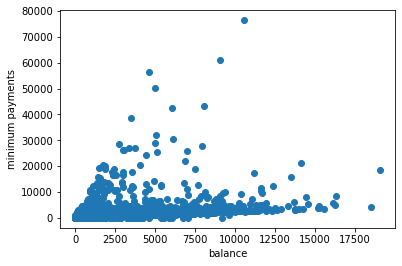

In [12]:
# Scatterplot
plt.figure()
plt.scatter(df['BALANCE'], df['MINIMUM_PAYMENTS'])
plt.xlabel('balance')
plt.ylabel('minimum payments')
plt.show()

Looks like we have a linear relationship between the BALANCE and MINIMUM_PAYMENTS, so we might consider imputing missing MINIMUM_PAYMENT values using some formula, e.g. `min_payment = beta*balance`.

In [15]:
(df['MINIMUM_PAYMENTS']/df['BALANCE']).median()

0.4449815141788248

We might consider imputing minimum_payment as 0.44x BALANCE.

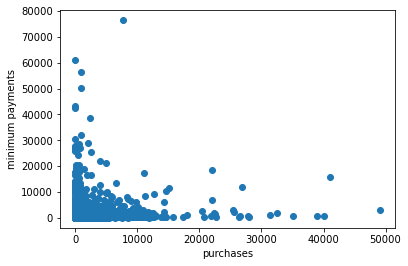

In [13]:
# Try looking at Purchases as well
plt.figure()
plt.scatter(df['PURCHASES'], df['MINIMUM_PAYMENTS'])
plt.xlabel('purchases')
plt.ylabel('minimum payments')
plt.show()

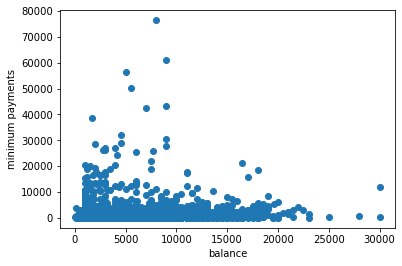

In [14]:
# Try credit limit
plt.figure()
plt.scatter(df['CREDIT_LIMIT'], df['MINIMUM_PAYMENTS'])
plt.xlabel('balance')
plt.ylabel('minimum payments')
plt.show()

Since this is only 73 rows, we can also just drop them.

We'll take that approach.

In [16]:
df.isna().sum()

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         1
PAYMENTS                             0
MINIMUM_PAYMENTS                    73
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

We'll drop all remaining rows with null values.

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(8876, 17)

In [19]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

He haven't checked yet the data type that each column is stored as. Even though they look numeric, they might be stored as strings. Let's check:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8876 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8876 non-null   float64
 1   BALANCE_FREQUENCY                 8876 non-null   float64
 2   PURCHASES                         8876 non-null   float64
 3   ONEOFF_PURCHASES                  8876 non-null   float64
 4   INSTALLMENTS_PURCHASES            8876 non-null   float64
 5   CASH_ADVANCE                      8876 non-null   float64
 6   PURCHASES_FREQUENCY               8876 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8876 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8876 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8876 non-null   float64
 10  CASH_ADVANCE_TRX                  8876 non-null   int64  
 11  PURCHASES_TRX                     8876 non-null   int64  
 12  CRED

### Exploration

Examining distributions of each column:

In [21]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

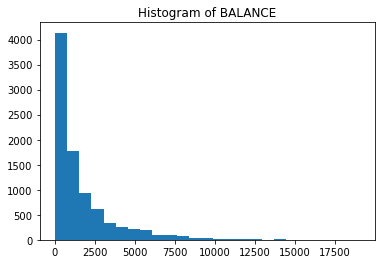

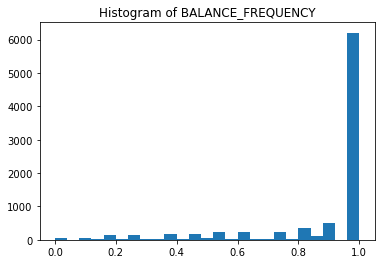

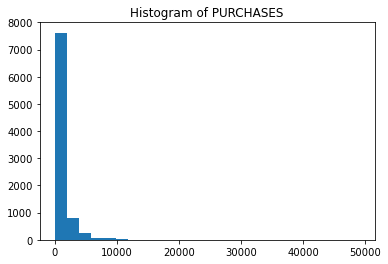

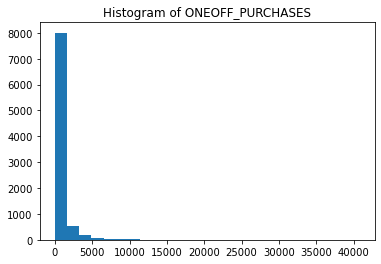

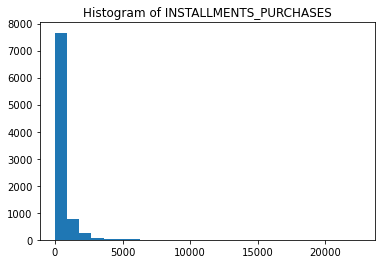

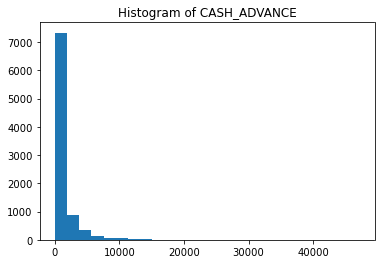

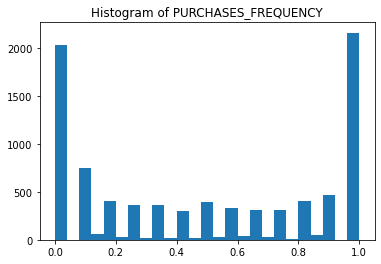

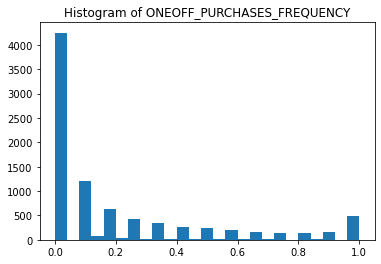

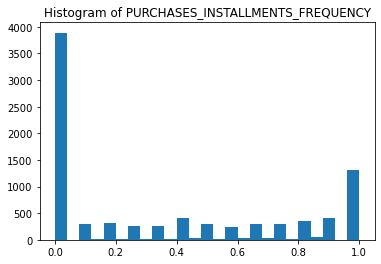

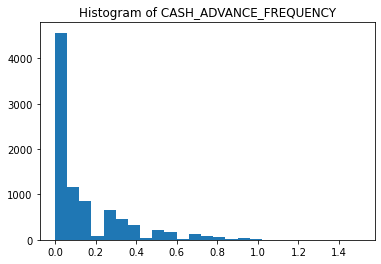

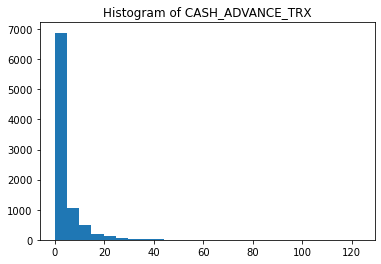

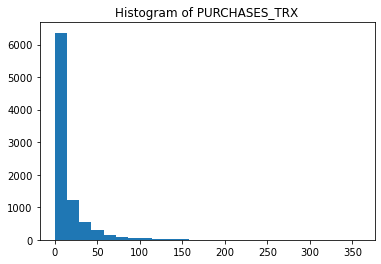

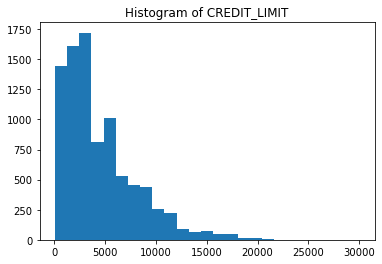

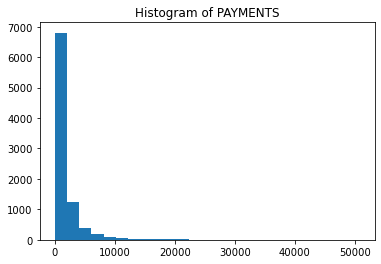

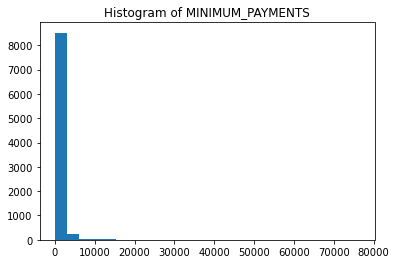

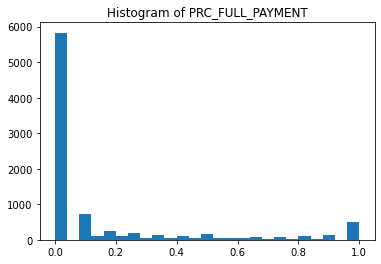

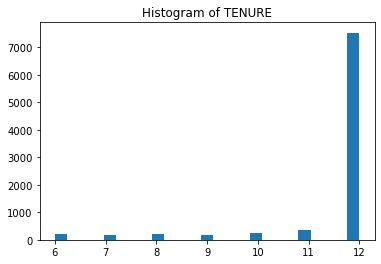

In [22]:
for column in df.columns:
    
    plt.figure()
    plt.hist(df[column], bins=25)
    plt.title(f'Histogram of {column}')
    plt.show()

We're seeing a lot of power-law distribution in our features, (i.e. very many low values, very few high values). These distributions can be challenging to work with, especially in the world of clustering, because those few high outliers really get in the way of meaningful distance calculations. 

We'll do some feature engineer by applying a log transformation to these columns:

In [23]:
df2 = np.log(df+1)

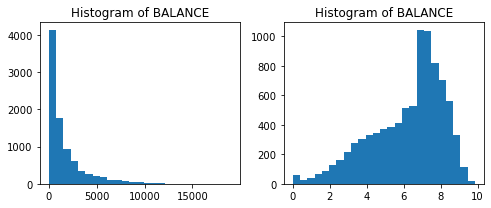

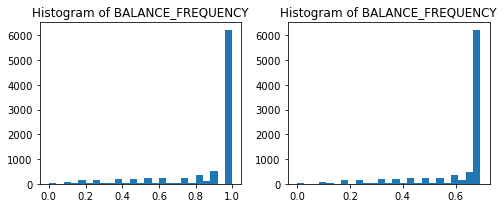

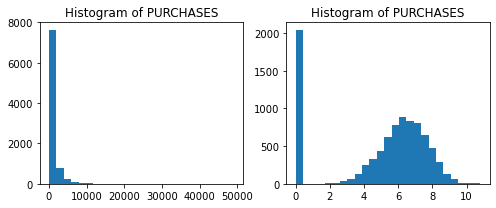

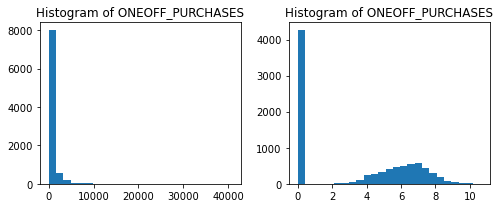

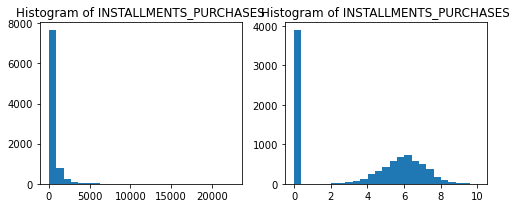

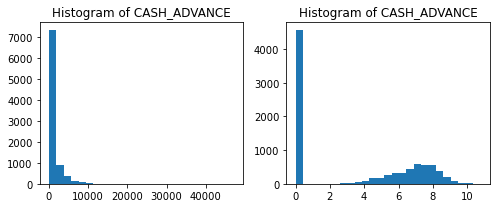

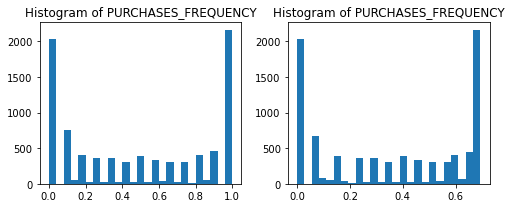

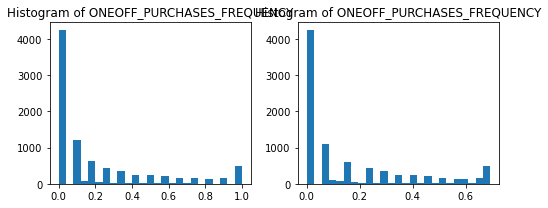

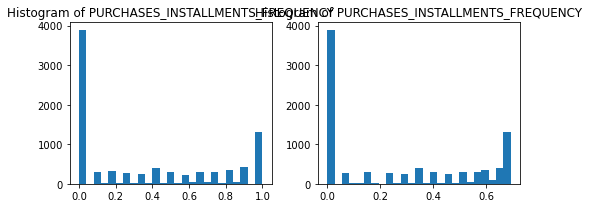

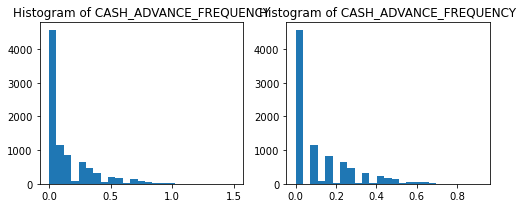

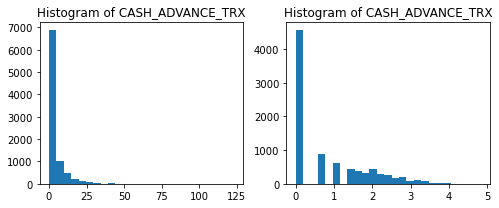

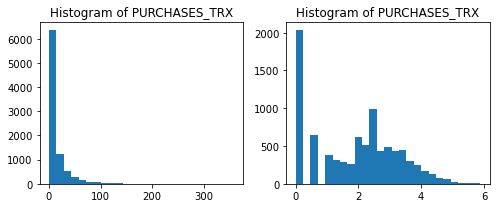

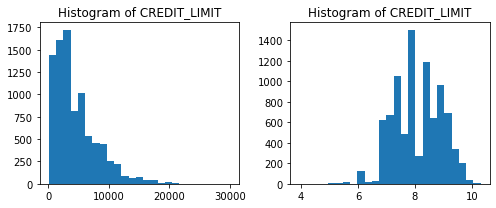

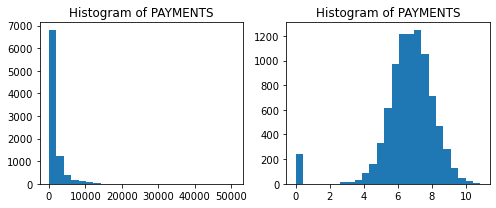

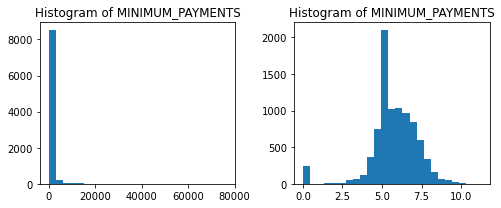

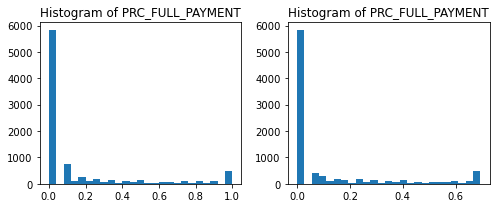

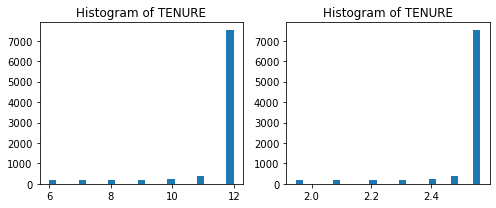

In [25]:
for column in df.columns:
    
    plt.subplots(1,2, figsize=(7,3))
    
    # plot original hist
    plt.subplot(1,2,1)
    plt.hist(df[column], bins=25)
    plt.title(f'Histogram of {column}')
    
    # plot transformed hist
    plt.subplot(1,2,2)
    plt.hist(df2[column], bins=25)
    plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

Our power-law columns are now much more evenly distributed, closer to a normal distribution, after having applied the log transform. The other columns are largely unaffected.

One interesting feature of note:

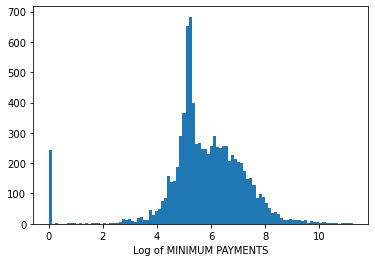

In [30]:
plt.figure()
plt.hist(df2['MINIMUM_PAYMENTS'], bins=100)
plt.xlabel('Log of MINIMUM PAYMENTS')
plt.show()

We have a large spike at around 5. It almost appears to be another distribution. Unsure what this corresponds to, perhaps this is the default value upon registration, or the bank had a promotion at this value, or customers with worse credit histories have higher minimum payment values, but I wouldn't expect this to appear organically when the rest of the column has such a well-distributed shape.

Now that our data has been transformed to a friendlier shape, let's take a look at a pair plot:

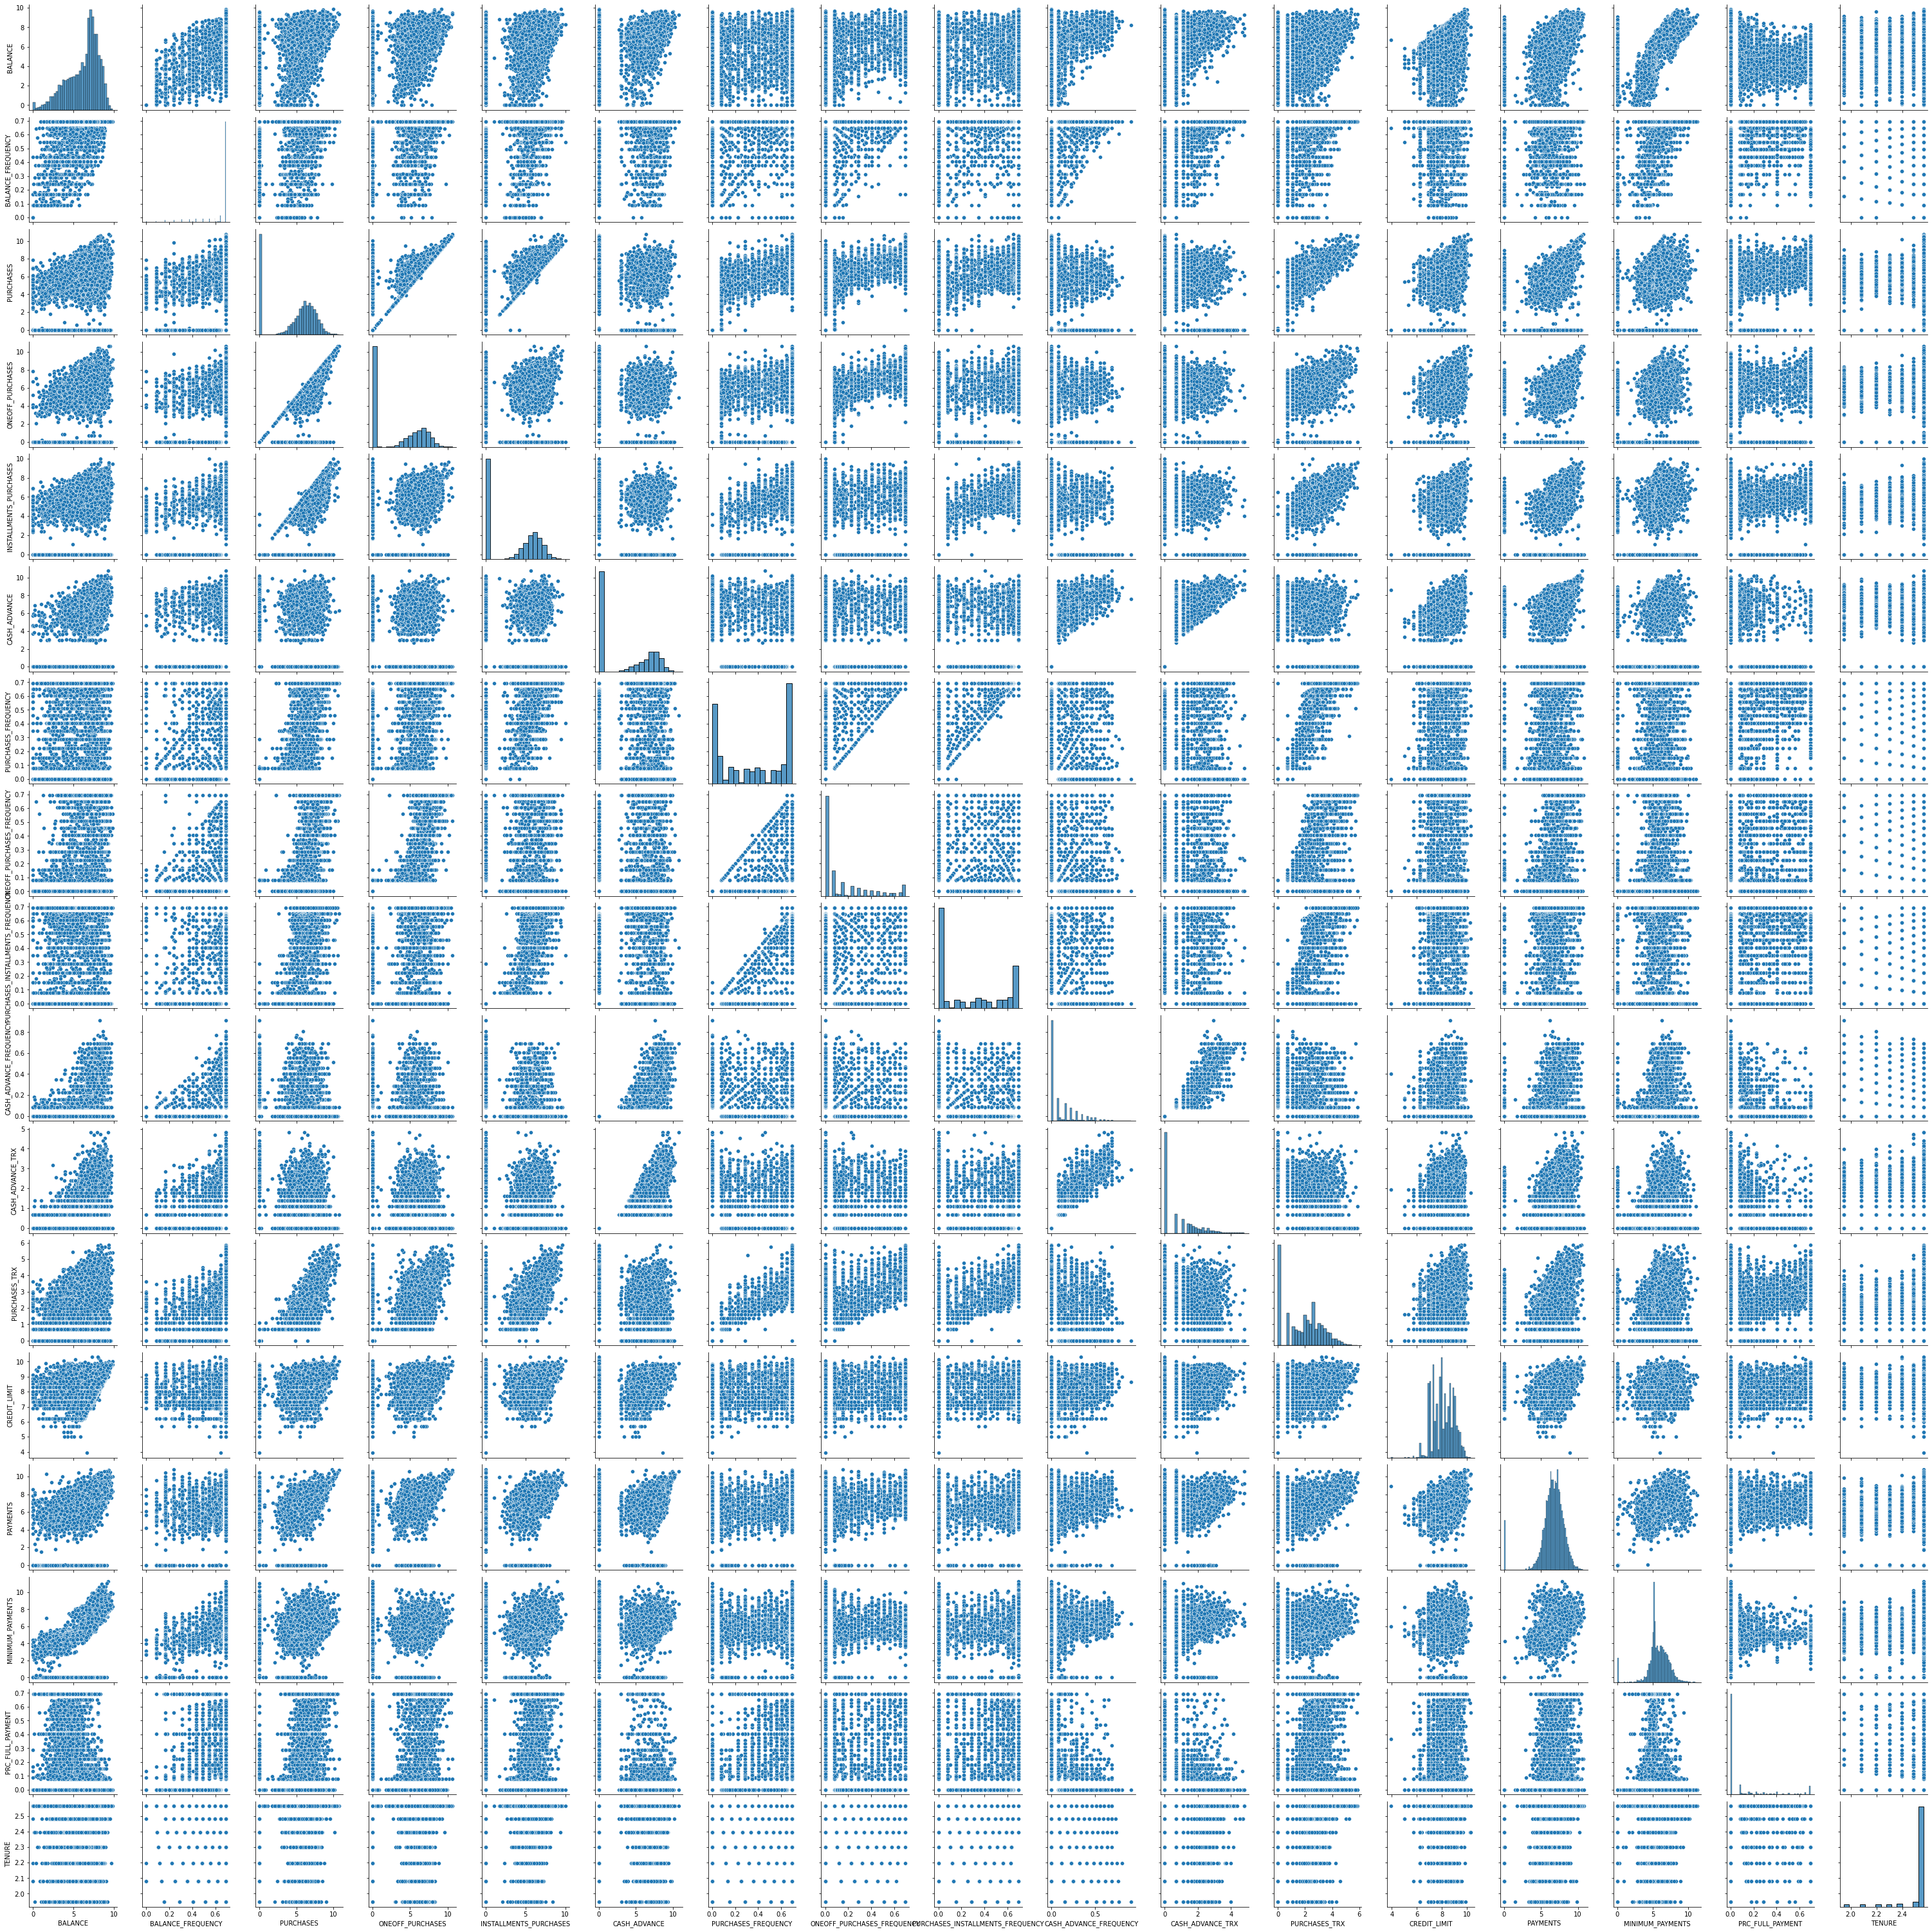

In [32]:
import seaborn as sns

sns.pairplot(df2)

This is a huge pairplot where it is difficult to read the specific column names, but there are certainly some strong relationships that are immediately obvious.
* linear relationships (many)
* bounded relationships (where values only exist in the upper left triangle for example)

This is a sign that there is structure in the data, and so clustering might lead to some useful insights.

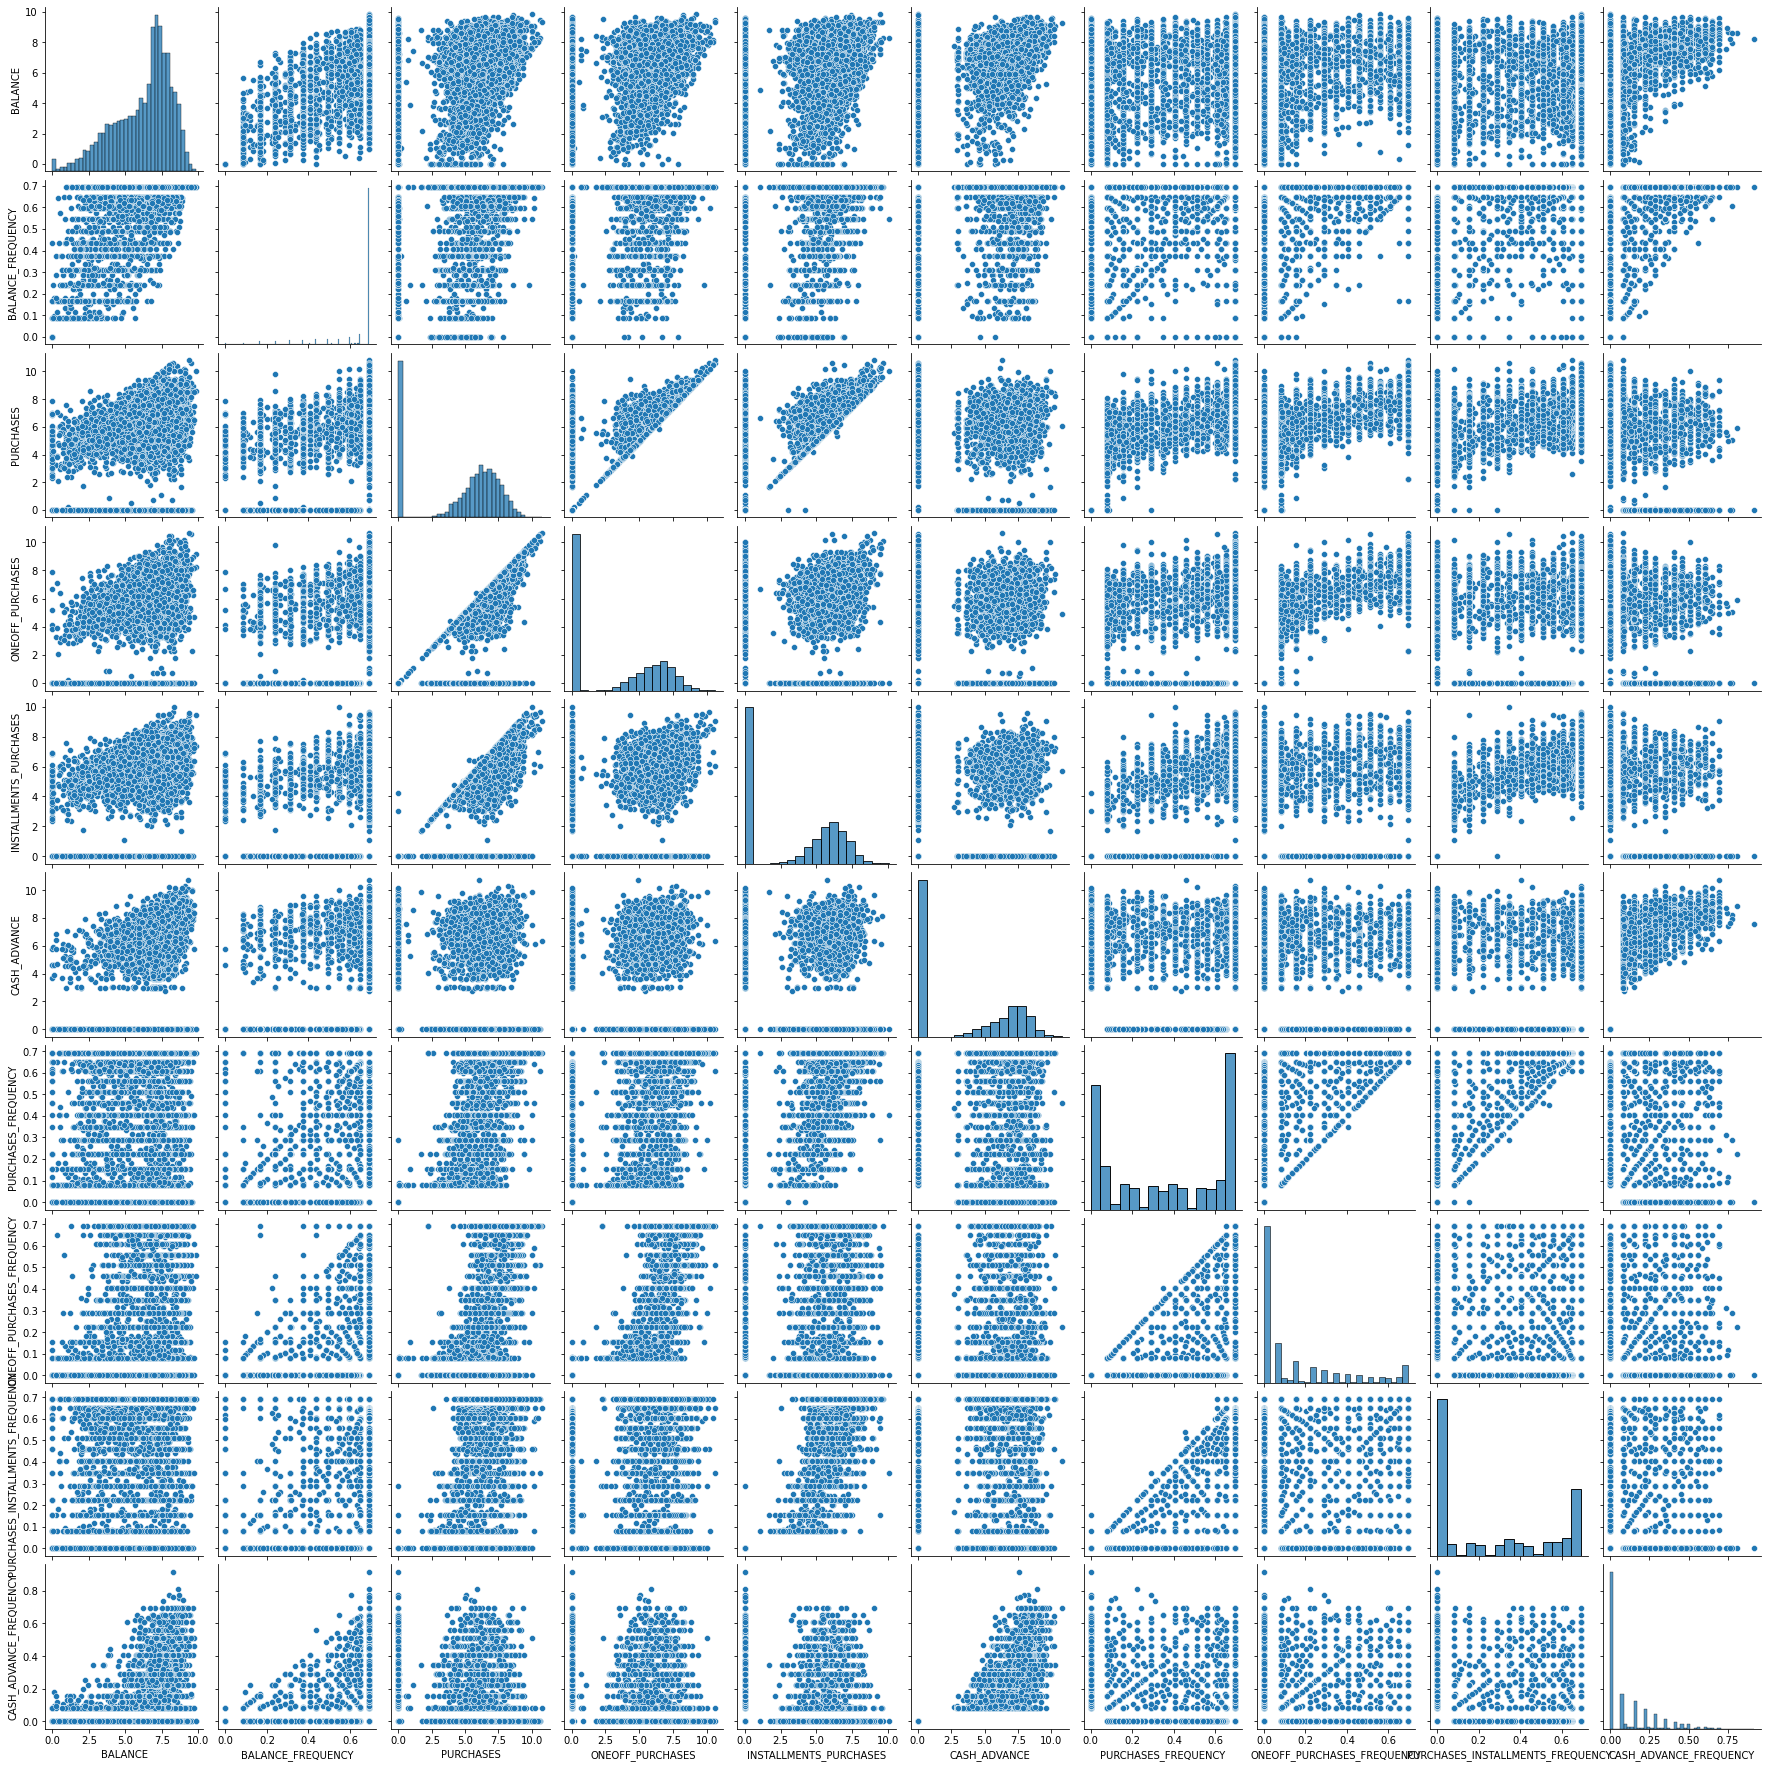

In [34]:
sns.pairplot(df2.iloc[:, :10])

### Visualizing our data using PCA

By applying principal component analysis, we can visualize the first few principal components, which give the best angle at viewing this higher-dimensional cloud of data. From this angle, we might be able to tell how many clusters is suitable for this data.

In [36]:
from sklearn.decomposition import PCA

# set up our PCA object, we'll take a look at the first 4 principal components
pca = PCA(n_components=4)

pc_data = pca.fit_transform(df2)

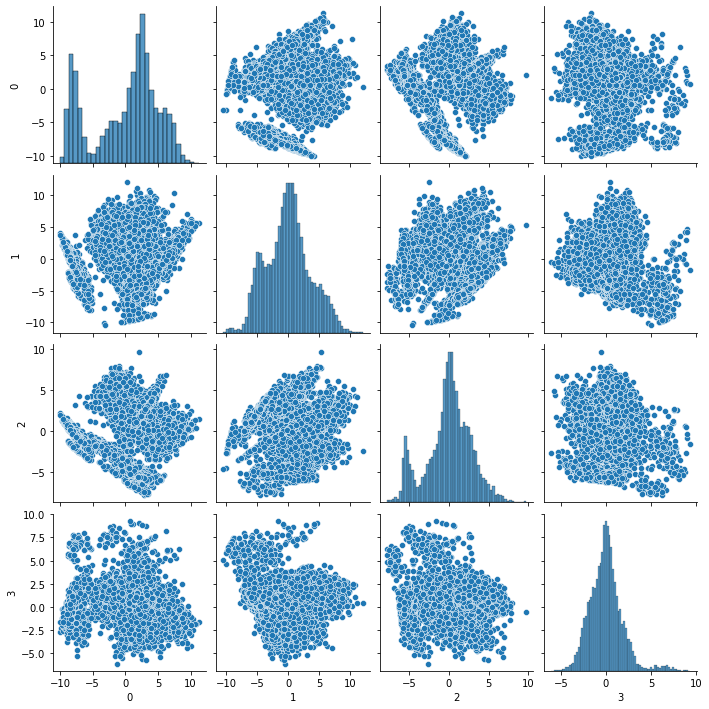

In [38]:
# Do a pairplot of this pca-transformed data to view a few different angles
sns.pairplot(pd.DataFrame(pc_data))

Seems like there might be some cluster structure to be extracted. The first principal component seems pretty separable into 2 groups, and many of these scatter plots seem like they have 2 groups as well.

#### Visualizing with t-SNE

This is a technique for visualizing higher-dimensional data in 2D while preserving much of its structure.

In [46]:
from sklearn.manifold import TSNE

# t-SNE is pretty slow, so let's sample our data
# sample = df2.sample(frac=0.2)

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(pc_data)

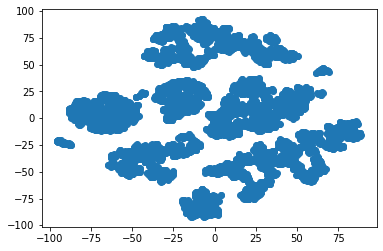

In [47]:
plt.figure()
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

This shows some very clear separation into approximately 7 groups.

The next steps will be actually performing a clustering and evaluating based on inertia score or silhouette score.

### Clustering

First step is to scale our data:

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df2)

##### KMeans

In [55]:
from sklearn.cluster import KMeans

k_values = range(1, 21)
inertia_list = []

for k in k_values:
    
    # Create & fit our kmeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Get inertia score and add to our list
    inertia_list.append(kmeans.inertia_)

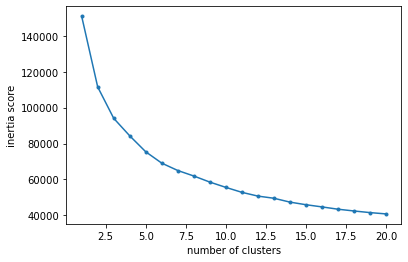

In [56]:
# Visualize the scree plot
plt.figure()
plt.plot(k_values, inertia_list, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.show()

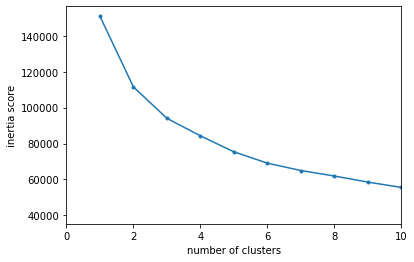

In [57]:
# Zoom into a smaller x-range
plt.figure()
plt.plot(k_values, inertia_list, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.xlim(0,10)
plt.show()

We don't see much of an elbow in this scree plot -- perhaps a small one when k=2. We'll turn to the silhouette score to see whether that is more informative.

In [61]:
from sklearn.metrics import silhouette_score

k_values = range(2, 21)
silhouette_scores = []

for k in k_values:
    
    # Create & fit our kmeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Get cluster labels and calculate the silhouette score
    cluster_labels = kmeans.labels_
    silhouette = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette)

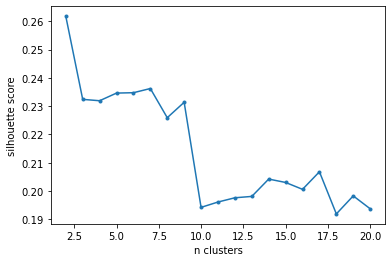

In [62]:
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('n clusters')
plt.ylabel('silhouette score')
plt.show()

We see the highest silhouette score when k=2, and the next highest at k=7. These would be our 2 best candidates for number of clusters. (Both values were already suggested to us by our visualizations!)

##### Agglomerative Clustering

Let's see how this clusters the data and whether the silhouette scores agree with optimal values.

In [63]:
from sklearn.cluster import AgglomerativeClustering

k_values = range(2, 21)
silhouette_scores = []

for k in k_values:
    
    # Create & fit our agglomerative model
    aggclust = AgglomerativeClustering(n_clusters=k)
    aggclust.fit(X)
    
    # Get cluster labels and calculate the silhouette score
    cluster_labels = aggclust.labels_
    silhouette = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette)

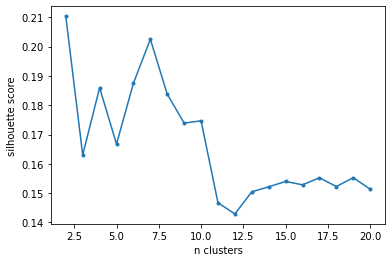

In [64]:
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('n clusters')
plt.ylabel('silhouette score')
plt.show()

Silhouette scores are a bit lower than KMeans overall, but it still shows optimal values at k=2 and k=7.

##### DBSCAN

In [66]:
from sklearn.cluster import DBSCAN

silhouette_scores = []
n_clusters = []
eps_values = []

for eps in np.arange(0.1, 3, 0.1):
    
    # create and fit a DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X)
    
    # Find the number of clusters
    cluster_labels = dbscan.labels_
    non_noise_labels = cluster_labels[cluster_labels != -1]
    n = len(np.unique(non_noise_labels))
    
    if n > 1:
    
        # Silhouette score
        silhouette = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette)
        eps_values.append(eps)
        n_clusters.append(n)
    
    # Print some info
    print(f'eps:{eps}, n_clusters:{n}')

eps:0.1, n_clusters:0
eps:0.2, n_clusters:4
eps:0.30000000000000004, n_clusters:13
eps:0.4, n_clusters:32
eps:0.5, n_clusters:38
eps:0.6, n_clusters:40
eps:0.7000000000000001, n_clusters:49
eps:0.8, n_clusters:58
eps:0.9, n_clusters:56
eps:1.0, n_clusters:46
eps:1.1, n_clusters:29
eps:1.2000000000000002, n_clusters:17
eps:1.3000000000000003, n_clusters:13
eps:1.4000000000000001, n_clusters:14
eps:1.5000000000000002, n_clusters:16
eps:1.6, n_clusters:12
eps:1.7000000000000002, n_clusters:13
eps:1.8000000000000003, n_clusters:11
eps:1.9000000000000001, n_clusters:8
eps:2.0, n_clusters:8
eps:2.1, n_clusters:4
eps:2.2, n_clusters:4
eps:2.3000000000000003, n_clusters:1
eps:2.4000000000000004, n_clusters:1
eps:2.5000000000000004, n_clusters:2
eps:2.6, n_clusters:2
eps:2.7, n_clusters:1
eps:2.8000000000000003, n_clusters:1
eps:2.9000000000000004, n_clusters:1


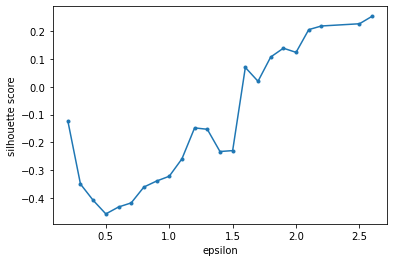

In [67]:
plt.figure()
plt.plot(eps_values, silhouette_scores, marker='.')
plt.xlabel('epsilon')
plt.ylabel('silhouette score')
plt.show()

We see the highest silhouette scores when eps=2.5 and 2.6, and this corresponds to when our DBSCAN found 2 clusters in the data. Overall this agrees with our other 2 clustering techniques.

We can conclude that 2 might be the optimal number of clusters for this dataset. Let's re-fit two of these models and examine the results.

In [70]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Create a new column in our dataset to hold the kmeans cluster label
df['kmeans_label'] = kmeans.labels_

In [71]:
aggclust = AgglomerativeClustering(n_clusters = 2)
aggclust.fit(X)

df['agg_label'] = aggclust.labels_

In [72]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   
...              ...                ...        ...               ...   
C19185    193.571722           0.833333    1012.73           1012.73   
C19186     28.493517           1.000000     291.12              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10004                     0.00    205.788017             0.083333   
C10005                     0.00      0.000000             0.083333   
...                         ...           ...                  ...   
C19185                     0.00      0.000000             0.333333   
C19186                   291.12      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   
...                             ...                               ...   
C19185                     0.333333                          0.000000   
C19186                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   
...                         ...               ...            ...   
C19185                 0.000000                 0              2   
C19186                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742

#### Visualizing clustering results



In [75]:
pca_df = pd.DataFrame(pc_data)
pca_df['kmeans_labels'] = kmeans.labels_
pca_df['agg_labels'] = aggclust.labels_

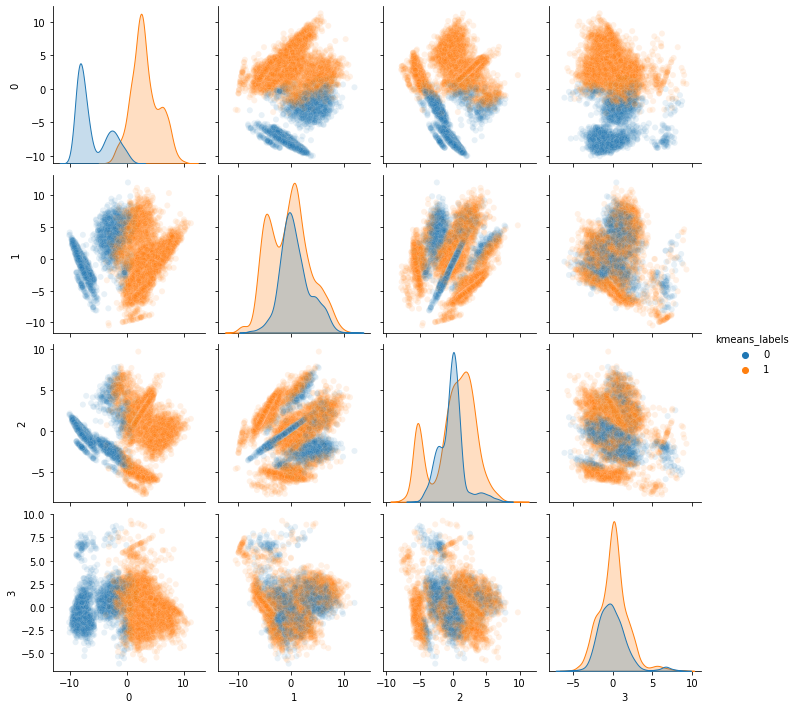

In [79]:
sns.pairplot(pca_df.drop(columns='agg_labels'), hue='kmeans_labels',
             plot_kws={'alpha': 0.1})


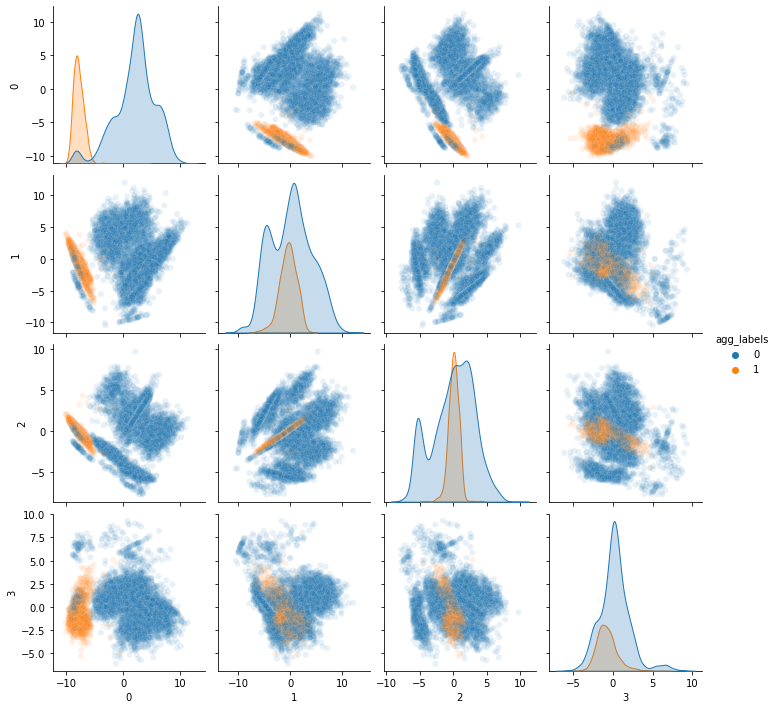

In [80]:
sns.pairplot(pca_df.drop(columns='kmeans_labels'), hue='agg_labels',
             plot_kws={'alpha': 0.1})

In [81]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(pc_data)

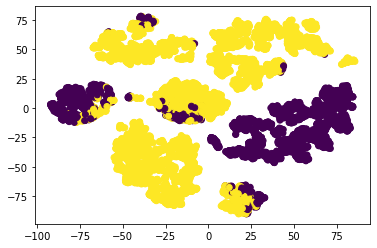

In [84]:
plt.figure()
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=pca_df['kmeans_labels'])
plt.show()

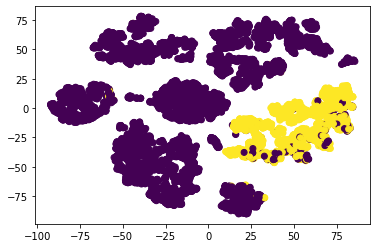

In [83]:
plt.figure()
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=pca_df['agg_labels'])
plt.show()

Based on these visualizations, it looks like while different in terms their specific clusterings, the agglomerative and kmeans models both came to reasonable clusterings of the data.

Let's now examine the real-world difference between the two clusters.

#### Cluster characteristics

In [85]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   
...              ...                ...        ...               ...   
C19185    193.571722           0.833333    1012.73           1012.73   
C19186     28.493517           1.000000     291.12              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10004                     0.00    205.788017             0.083333   
C10005                     0.00      0.000000             0.083333   
...                         ...           ...                  ...   
C19185                     0.00      0.000000             0.333333   
C19186                   291.12      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   
...                             ...                               ...   
C19185                     0.333333                          0.000000   
C19186                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   
...                         ...               ...            ...   
C19185                 0.000000                 0              2   
C19186                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742

In [89]:
df.drop(columns='agg_label').groupby('kmeans_label').mean().transpose()

kmeans_label                                0            1
BALANCE                           2349.316383  1167.728394
BALANCE_FREQUENCY                    0.905268     0.871871
PURCHASES                          134.082086  1473.304752
ONEOFF_PURCHASES                   109.846449   854.403182
INSTALLMENTS_PURCHASES              24.275166   619.343957
CASH_ADVANCE                      2155.188788   366.443193
PURCHASES_FREQUENCY                  0.086187     0.704803
ONEOFF_PURCHASES_FREQUENCY           0.051772     0.284486
PURCHASES_INSTALLMENTS_FREQUENCY     0.032981     0.539337
CASH_ADVANCE_FREQUENCY               0.293854     0.052422
CASH_ADVANCE_TRX                     7.138726     1.223525
PURCHASES_TRX                        1.507472    21.827699
CREDIT_LIMIT                      4294.597535  4618.033273
PAYMENTS                          1778.990117  1713.525575
MINIMUM_PAYMENTS                  1058.364973   725.507089
PRC_FULL_PAYMENT                     0.039279     0.216427
TENURE                              11.332684    11.618144

Based on KMeans clustering, we see some potential meaning in these clusterings:

**Group 0 (maybe "risky customer"):**
- higher balance
- fewer purchases (?)
- uses cash advances to a higher degree
- higher minimum payments

**Group 1 (maybe "conservative customer"):**
- lower balance
- more purchases (?)
- fewer cash advances
- lower minimum payments

In [90]:
df.drop(columns='kmeans_label').groupby('agg_label').mean().transpose()

agg_label                                   0            1
BALANCE                           1401.038874  2248.934928
BALANCE_FREQUENCY                    0.877557     0.905889
PURCHASES                         1273.576351     1.601213
ONEOFF_PURCHASES                   752.793707     0.297807
INSTALLMENTS_PURCHASES             521.152209     1.351565
CASH_ADVANCE                       725.672723  1980.268087
PURCHASES_FREQUENCY                  0.618753     0.001362
ONEOFF_PURCHASES_FREQUENCY           0.257166     0.000640
PURCHASES_INSTALLMENTS_FREQUENCY     0.459159     0.000632
CASH_ADVANCE_FREQUENCY               0.100833     0.270531
CASH_ADVANCE_TRX                     2.440888     6.448295
PURCHASES_TRX                       18.660122     0.018950
CREDIT_LIMIT                      4598.998643  4151.470854
PAYMENTS                          1711.321325  1831.009894
MINIMUM_PAYMENTS                   780.379269  1071.386901
PRC_FULL_PAYMENT                     0.182944     0.048637
TENURE                              11.473325    11.693557

The agglomerative clustering shows major differences along the same features.

#### Do the clusterings agree with one another?

We have some evidence that the clusterings agree with one another (the same features are used to distinguish 0 from 1 in both), along with some visual evidence too, although there's clear disagreement in the visuals for many points.

Exactly how many points do the clusterings agree for?

In [92]:
pd.crosstab(df['kmeans_label'], df['agg_label'])

agg_label        0     1
kmeans_label            
0             1237  1841
1             5792     6

While at first glance there might not be much agreement visible here, the fact that much of the data appears in the off-diagonal is a good sign. This tells us that points labelled as 1 under KMeans are extremely likely to be labeled as 0 in Agglomerative, and there's also fairly high likelihood of KMeans 0's being Agglomerative 1's.

In [94]:
pd.crosstab(df['kmeans_label'], df['agg_label']) / len(df)

agg_label            0         1
kmeans_label                    
0             0.139365  0.207413
1             0.652546  0.000676

Assuming the cluster labels are just swapped from KMeans to Agglomerative, this actually looks pretty good, since ~85% of the data is along the off-diagonal.

And we have good evidence to believe the labels are swapped, because the properties of the 0s & 1s are reversed in our exploration of the average values per feature in each cluster. 

To boil this down into a single metric, we can compute the adjusted rand index, which outputs a score between 0 and 1 that characterizes to what degree two clusterings are in agreement:

In [97]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(df['kmeans_label'], df['agg_label'])

0.5023197764894871